/var/folders/00/hbv3fx115yx7drr245f5hxmm0000gn/T/ipykernel_72943/2588134066.py:18: RuntimeWarning: Mean of empty slice
  up_copy[i, j] = np.nanmean(up[i-1:i+2, j-1:j+2])


AttributeError: 'AxesImage' object has no attribute 'get_axes'

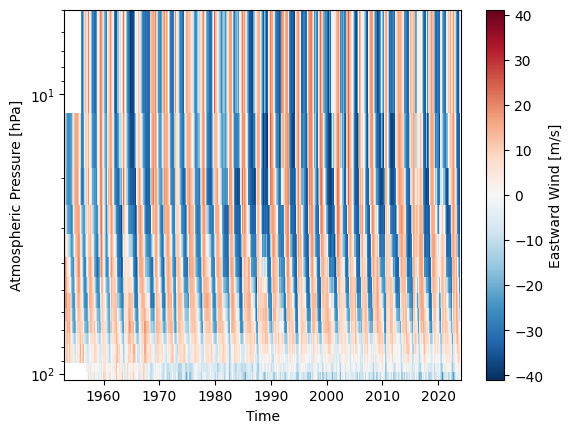

In [4]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

def replace_nan(up):
    # Assuming 'up' is your two-dimensional array
    # Replace NaN values with the mean of surrounding non-NaN values, excluding boundaries
    up_copy = up.copy()  # Create a copy to avoid modifying the original array
    nan_mask = np.isnan(up)

    # Loop through rows and columns
    for i in range(1, up.shape[0] - 1):
        for j in range(1, up.shape[1] - 1):
            if nan_mask[i, j]:
                # Replace NaN value with the mean of surrounding non-NaN values
                up_copy[i, j] = np.nanmean(up[i-1:i+2, j-1:j+2])

    # Replace the original array with the modified copy
    up = up_copy
    return up


ds = xr.open_dataset('radiosonde_tropical_eastward_wind_195301.nc')
# Assuming you have 'ds' as your dataset and 'pressure' and 'u' as variables
ax = replace_nan(ds.u).plot.imshow(y='pressure', yscale='log', yincrease=False)  # Or choose contourf

# Convert datetime strings to datetime objects
start_date = pd.to_datetime('1953-01-01')
end_date = pd.to_datetime('1963-01-01')

# Convert datetime objects to numeric values
start_date_num = mdates.date2num(start_date)
end_date_num = mdates.date2num(end_date)

# Access the underlying Axes object
# Access the underlying Axes object
axes = ax.get_figure().get_axes()[0]
axes = ax.get_axes()

# Set x-axis limits
axes.set_xlim(start_date_num, end_date_num)

plt.xlabel('Time')
plt.ylabel('Pressure (log scale)')
plt.title('Imshow Plot of "u" with Logarithmic Pressure')
plt.colorbar(label='Windspeed')
plt.show()